In [5]:
#implementing the relevant packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline  
import warnings
warnings.filterwarnings('ignore')

# python standard library
from fractions import Fraction

# pypi
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [113]:
#Read csv file and storethe data in friends_list
friends_list = pd.read_csv('facebook_datafile.csv')
friends_list.head(90000)

#print(rawlist2)

,column1,column2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [114]:
#create columns list 
friends_list.columns = ["Column1", "Column2"]
rawlist1 = list(friends_list.Column1)
rawlist2 = list(friends_list.Column2)

In [115]:
#Create graph object
G = nx.DiGraph()

# Each element of this zip will be
# (source[i], dest[i]) 

for u,v in zip(rawlist1, rawlist2):
    G.add_edge(u, v)
 
G.add_edges_from(G.edges) 
e = list(G.edges()) 
#print(e)
 
def triadic(e): 
   new_edges = [] 
  
   for i in e: 
    a, b = i 
  
    for j in e: 
      x, y = j 
  
      if i != j: 
        if a == x and (b, y) not in e and (y, b) not in e: 
          new_edges.append((b, y)) 
        if a == y and (b, x) not in e and (x, b) not in e: 
          new_edges.append((b, x)) 
        if b == x and (a, y) not in e and (y, a) not in e: 
          new_edges.append((a, y)) 
        if b == y and (a, x) not in e and (x, a) not in e: 
          new_edges.append((a, x)) 
  
    return new_edges 
  
print("The possible new edges according to Triadic closure are :") 
print(triadic(e))


#nx.draw_spring(G, with_labels=True)

The possible new edges according to Triadic closure are :
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 49), (1, 50), (1, 51), (1, 52), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 89), (1, 90), (1, 91), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 111), (

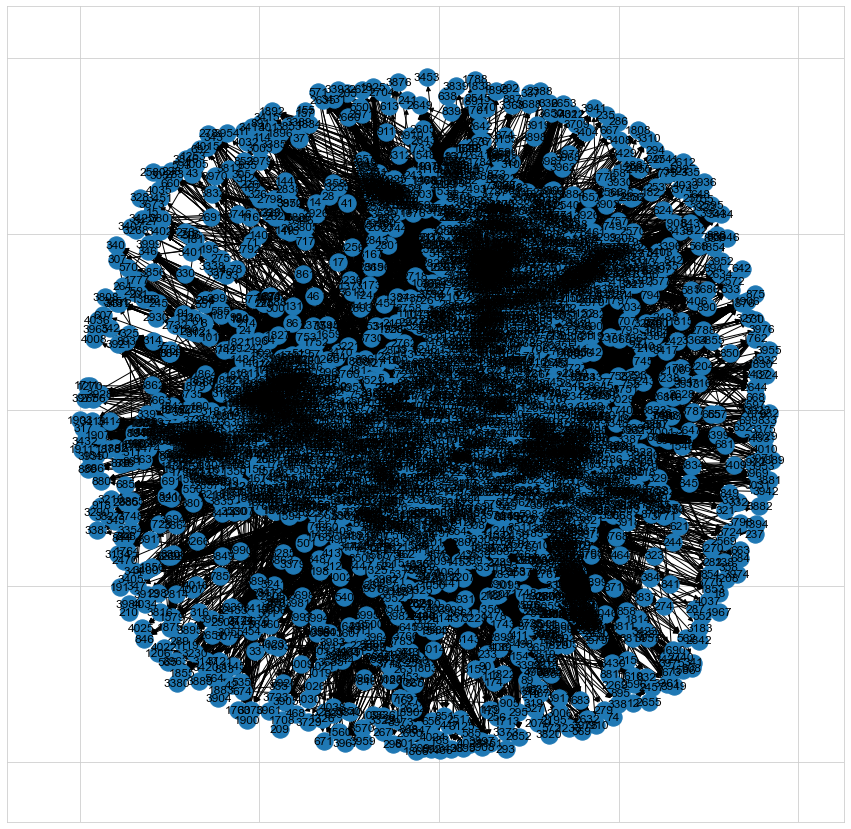

In [144]:
#It's a measure of the degree to which nodes in a graph tend to cluster together
# f_split = friends_list.sample(frac=0.1,random_state=200) 
# f_split.reset_index()

friends_list.columns = ["Column1", "Column2"]
rawlist1 = list(friends_list.Column1)
rawlist2 = list(friends_list.Column2)

#print(f_split)
sample_graph = nx.DiGraph()
for k,l in zip(rawlist1, rawlist2):
    sample_graph.add_edge(k, l)
    
sample_graph.add_edges_from(sample_graph.edges)
# print(sample_graph.edges)
plt.figure(figsize=(15,15)) # 7.5 inches*7.5 inches
nx.draw_networkx(sample_graph)
plt.show()
#nx.draw_spring(G, with_labels=True)


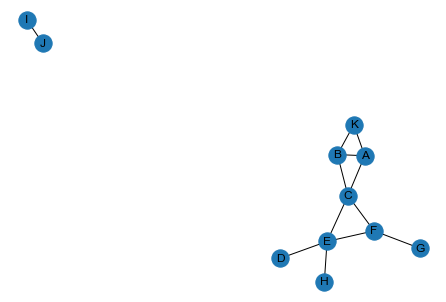

In [85]:
graph = networkx.Graph()
graph.add_edges_from([("A", "K"), ("A", "B"), ("A", "C"),
                      ("B", "K"), ("B", "C"),
                      ("C", "E"), ("C", "F"),
                      ("D", "E"),
                      ("E", "F"), ("E", "H"),
                      ("F", "G"),
                      ("I", "J")])

networkx.draw_spring(graph, with_labels=True)

In [86]:
#measure of clustering for a single node.
print(networkx.clustering(graph, "C"))

0.3333333333333333


In [90]:
#measure of clustering for a single node.
print(float(networkx.clustering(graph, "I")))

0.0


In [93]:
#network average clustering coefficient.
coefficients = nx.clustering(graph)
average = sum(list(coefficients.values()))/len(coefficients)
print(average)
assert average == nx.average_clustering(graph)

0.28787878787878785


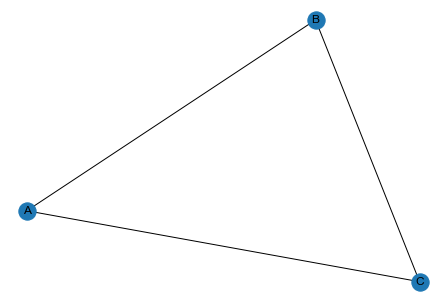

In [94]:
#generate closed triangle
triangle = networkx.Graph()
triangle.add_edges_from([("A", "B"), ("A", "C"), ("B", "C")])

networkx.draw_spring(triangle, with_labels=True)

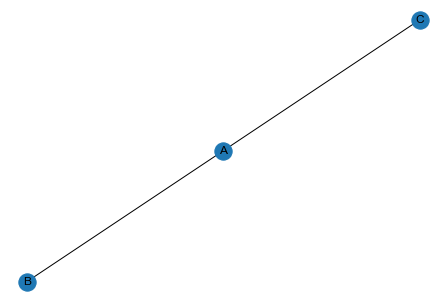

In [100]:
#generate open triangle
one = nx.Graph()
one.add_edges_from([("A", "B"), ("A", "C")])
nx.draw(one, with_labels=True)

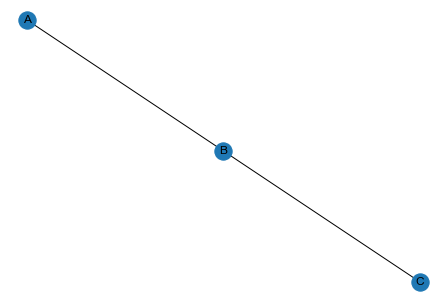

In [97]:
#generate open triangle
two = nx.Graph()
two.add_edges_from([("A", "B"), ("B", "C")])
nx.draw(two, with_labels=True)

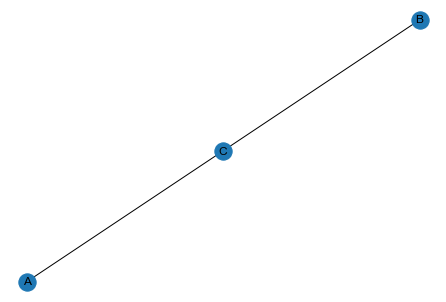

In [101]:
#generate open triangle
three = nx.Graph()
three.add_edges_from([("B", "C"), ("A", "C")])
three.add_edges_from([("B", "C"), ("A", "C")])
nx.draw(three, with_labels=True)

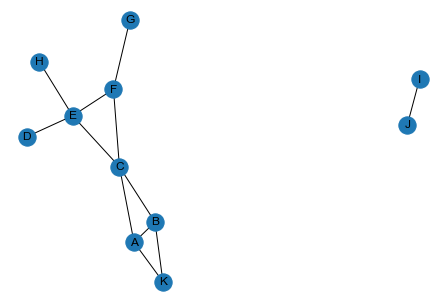

In [102]:
nx.draw_spring(graph, with_labels=True)

In [103]:
#Find transitivity
transitivity = (3 * 3)/(3 * 3 + 13)
print(transitivity)
assert transitivity == nx.transitivity(graph)

0.4090909090909091


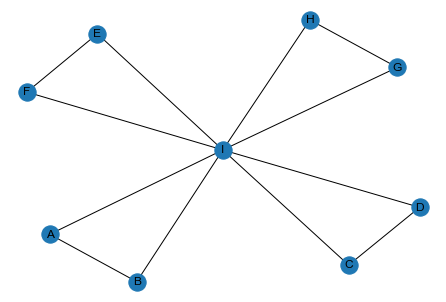

In [104]:
#
high_lcc = nx.Graph()
left = tuple("AABCCDEEFGGH")
right = tuple("BIIDIIFIIHII")
high_lcc.add_edges_from(list(zip(left, right)))
nx.draw_spring(high_lcc, with_labels=True)

In [105]:
degree_i = 8
pairs_of_friends = Fraction(8 * 7, 2)
pairs_that_are_friends = Fraction(4, 1)
lcc = pairs_that_are_friends/pairs_of_friends
print(lcc)

1/7


In [106]:
#coefficient of I
print(nx.average_clustering(high_lcc))

0.9047619047619047


In [107]:
print(nx.transitivity(high_lcc))

0.3333333333333333


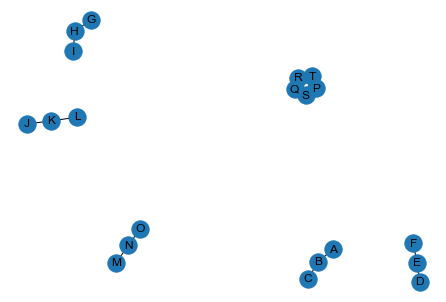

In [108]:
#Open pairs
outer_left = "ABDEGHJKMN"
inner_left = "PPPPQQQRRS"
outer_right = "BCEFHIKLNO"
inner_right = "QRSTRSTSTT"
left = tuple(outer_left + inner_left)
right = tuple(outer_right + inner_right)
low_average = nx.Graph()
low_average.add_edges_from(list(zip(left, right)))
nx.draw(low_average, with_labels=True)

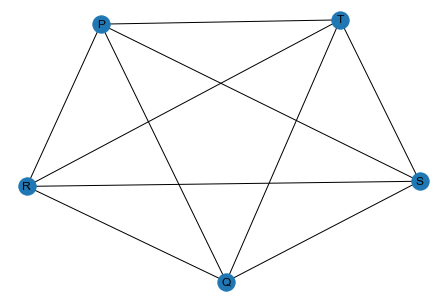

In [109]:
left = tuple(inner_left)
right = tuple(inner_right)
inner = nx.Graph()
inner.add_edges_from(list(zip(left, right)))
nx.draw(inner, with_labels=True)

In [110]:
#the average clustering coefficient 
print(nx.average_clustering(low_average))

0.25


In [111]:
#average transitivity
print(nx.transitivity(low_average))

0.8571428571428571
